In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [40]:
df1 = pd.read_csv("resaledata2017on.csv")
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [3]:
df1.shape

(161838, 11)

In [4]:
df1.groupby('town')['town'].agg('count')

town
ANG MO KIO          6710
BEDOK               8683
BISHAN              3023
BUKIT BATOK         5750
BUKIT MERAH         6218
BUKIT PANJANG       6078
BUKIT TIMAH          411
CENTRAL AREA        1335
CHOA CHU KANG       7388
CLEMENTI            3678
GEYLANG             4008
HOUGANG             7956
JURONG EAST         3333
JURONG WEST        10626
KALLANG/WHAMPOA     4866
MARINE PARADE       1025
PASIR RIS           4914
PUNGGOL            12022
QUEENSTOWN          4541
SEMBAWANG           4225
SENGKANG           13570
SERANGOON           2987
TAMPINES           10803
TOA PAYOH           5150
WOODLANDS          11412
YISHUN             11126
Name: town, dtype: int64

In [5]:
df1.groupby('storey_range')['storey_range'].agg('count')

storey_range
01 TO 03    28531
04 TO 06    37226
07 TO 09    33950
10 TO 12    30252
13 TO 15    15443
16 TO 18     7312
19 TO 21     3106
22 TO 24     2244
25 TO 27     1344
28 TO 30      869
31 TO 33      464
34 TO 36      428
37 TO 39      381
40 TO 42      184
43 TO 45       53
46 TO 48       37
49 TO 51       14
Name: storey_range, dtype: int64

In [6]:
df1.groupby('flat_model')['flat_model'].agg('count')

flat_model
2-room                       56
3Gen                         17
Adjoined flat               290
Apartment                  6151
DBSS                       2827
Improved                  40114
Improved-Maisonette          24
Maisonette                 4662
Model A                   55306
Model A-Maisonette          295
Model A2                   1856
Multi Generation             73
New Generation            20238
Premium Apartment         18484
Premium Apartment Loft       96
Premium Maisonette           14
Simplified                 6289
Standard                   4516
Terrace                      90
Type S1                     286
Type S2                     154
Name: flat_model, dtype: int64

In [8]:
df1.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [9]:
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [11]:
df1['flat_type'].unique()
df1.groupby('flat_type')['flat_type'].agg('count')

flat_type
1 ROOM                 61
2 ROOM               2647
3 ROOM              38127
4 ROOM              68009
5 ROOM              40660
EXECUTIVE           12261
MULTI-GENERATION       73
Name: flat_type, dtype: int64

In [42]:
df1['roomcount'] = df1['flat_type'].replace('EXECUTIVE','3.5 EXECUTIVE')

In [43]:
df1.head()
df1.groupby('roomcount')['roomcount'].agg('count')

roomcount
1 ROOM                 61
2 ROOM               2647
3 ROOM              38127
3.5 EXECUTIVE       12261
4 ROOM              68009
5 ROOM              40660
MULTI-GENERATION       73
Name: roomcount, dtype: int64

In [44]:
df1.head()
df2 = df1
df2 = df2[df2.roomcount != "MULTI-GENERATION"]
df2.groupby('roomcount')['roomcount'].agg('count')

roomcount
1 ROOM              61
2 ROOM            2647
3 ROOM           38127
3.5 EXECUTIVE    12261
4 ROOM           68009
5 ROOM           40660
Name: roomcount, dtype: int64

In [47]:
# df2 = df1
df2.head()

# df2 = df2[df2.roomcount != "MULTI-GENERATION"]

df2['roomcount'] = df2['roomcount'].apply(lambda x: float(x.split(' ')[0]))
df2.groupby('roomcount')['roomcount'].agg('count')
# df2['roomcount'] = df2['roomcount'].replace('EXECUTIVE',float(3.5))
# df2 = df2[df2.roomcount != "MULTI-GENERATION"]

/var/folders/m8/p0w2_kwn4y1c4prddbt9zf6r0000gn/T/ipykernel_89916/3360875005.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['roomcount'] = df2['roomcount'].apply(lambda x: float(x.split(' ')[0]))


roomcount
1.0       61
2.0     2647
3.0    38127
3.5    12261
4.0    68009
5.0    40660
Name: roomcount, dtype: int64

In [50]:
df2.groupby('floor_area_sqm')['floor_area_sqm'].agg('count')
# df2.floor_area_sqm.unique

floor_area_sqm
31.0     61
34.0     18
35.0      3
37.0     19
38.0     58
         ..
222.0     1
237.0     1
241.0     1
243.0     2
249.0     1
Name: floor_area_sqm, Length: 169, dtype: int64

In [51]:
df3 = df2.copy()
df3['total_sqft'] = df3['floor_area_sqm']*10.764
df3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,roomcount,total_sqft
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2.0,473.616
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,3.0,721.188
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,3.0,721.188
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,3.0,731.952
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,3.0,721.188


In [52]:
df3['price_per_sqft'] = df3['resale_price']/df3['total_sqft']
df3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,roomcount,total_sqft,price_per_sqft
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2.0,473.616,489.848316
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,3.0,721.188,346.650249
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,3.0,721.188,363.289461
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,3.0,731.952,362.045599
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,3.0,721.188,367.449264


In [54]:
# check small houses 
df3[df3['total_sqft']/df3.roomcount<300].head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,roomcount,total_sqft,price_per_sqft
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2.0,473.616,489.848316
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,3.0,721.188,346.650249
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,3.0,721.188,363.289461
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,3.0,731.952,362.045599
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,3.0,721.188,367.449264


In [56]:
df3.shape

(161765, 14)

In [57]:
df3.price_per_sqft.describe()

count    161765.000000
mean        468.612392
std         129.671606
min         194.124140
25%         379.600660
50%         442.391747
75%         523.138978
max        1393.534002
Name: price_per_sqft, dtype: float64

In [59]:
#Remove data beyond 1 standard deviation.
#remove outliers 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('town'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df4 = remove_pps_outliers(df3)
df4.shape

(112446, 14)

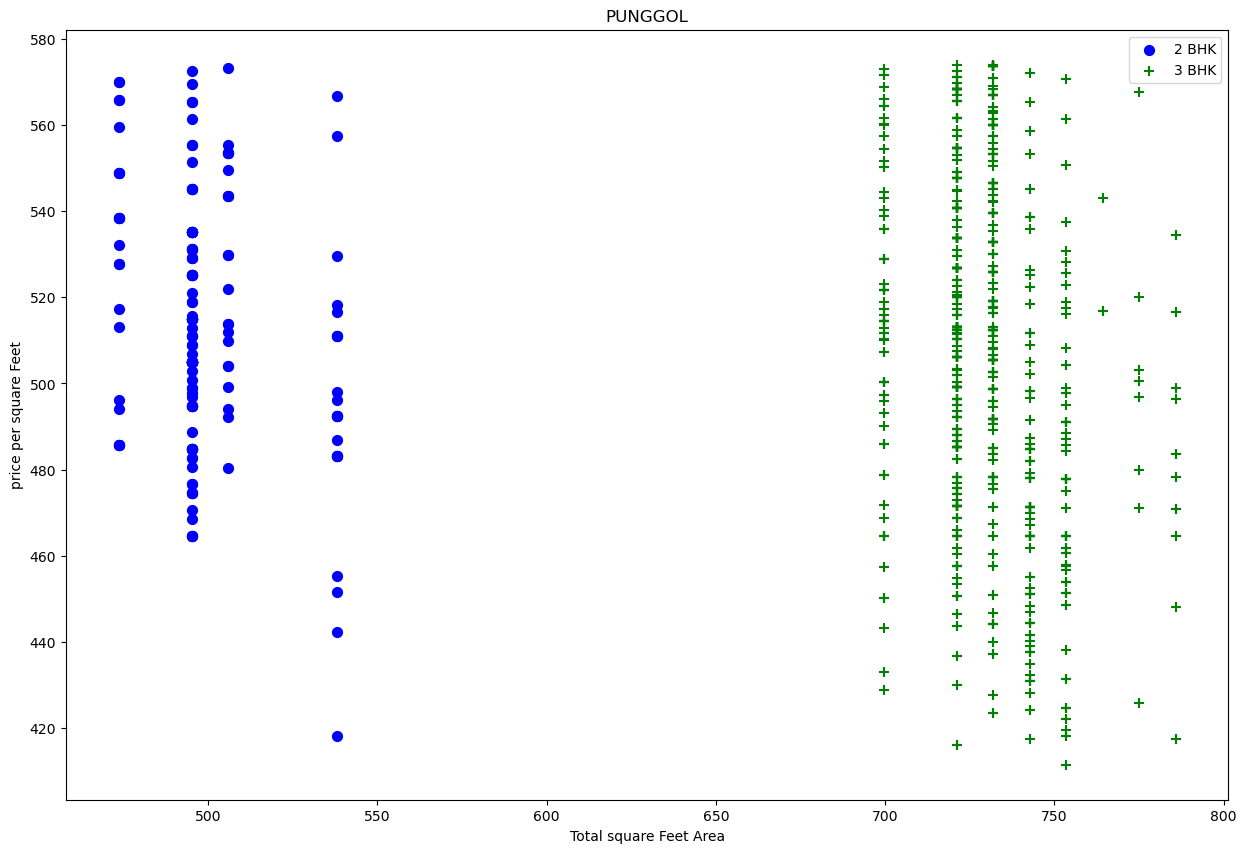

In [70]:
# bug room 1 and 4,5 not working
def plot_scatter_chart(df,location):
    bhk1 = df[(df.town==location) & (df.roomcount==1)]
    bhk2 = df[(df.town==location) & (df.roomcount==2)]
    bhk3 = df[(df.town==location) & (df.roomcount==3)]
    bhk4 = df[(df.town==location) & (df.roomcount==4)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK',s=50)
    # plt.scatter(bhk1.total_sqft,bhk1.price_per_sqft,marker='*',color='orange',label='1 BHK',s=50)
    # plt.scatter(bhk4.total_sqft,bhk4.price_per_sqft,marker='#',color='pink',label='4 BHK',s=50)
    plt.xlabel("Total square Feet Area")
    plt.ylabel("price per square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df4,"PUNGGOL")

Text(0, 0.5, 'Count')

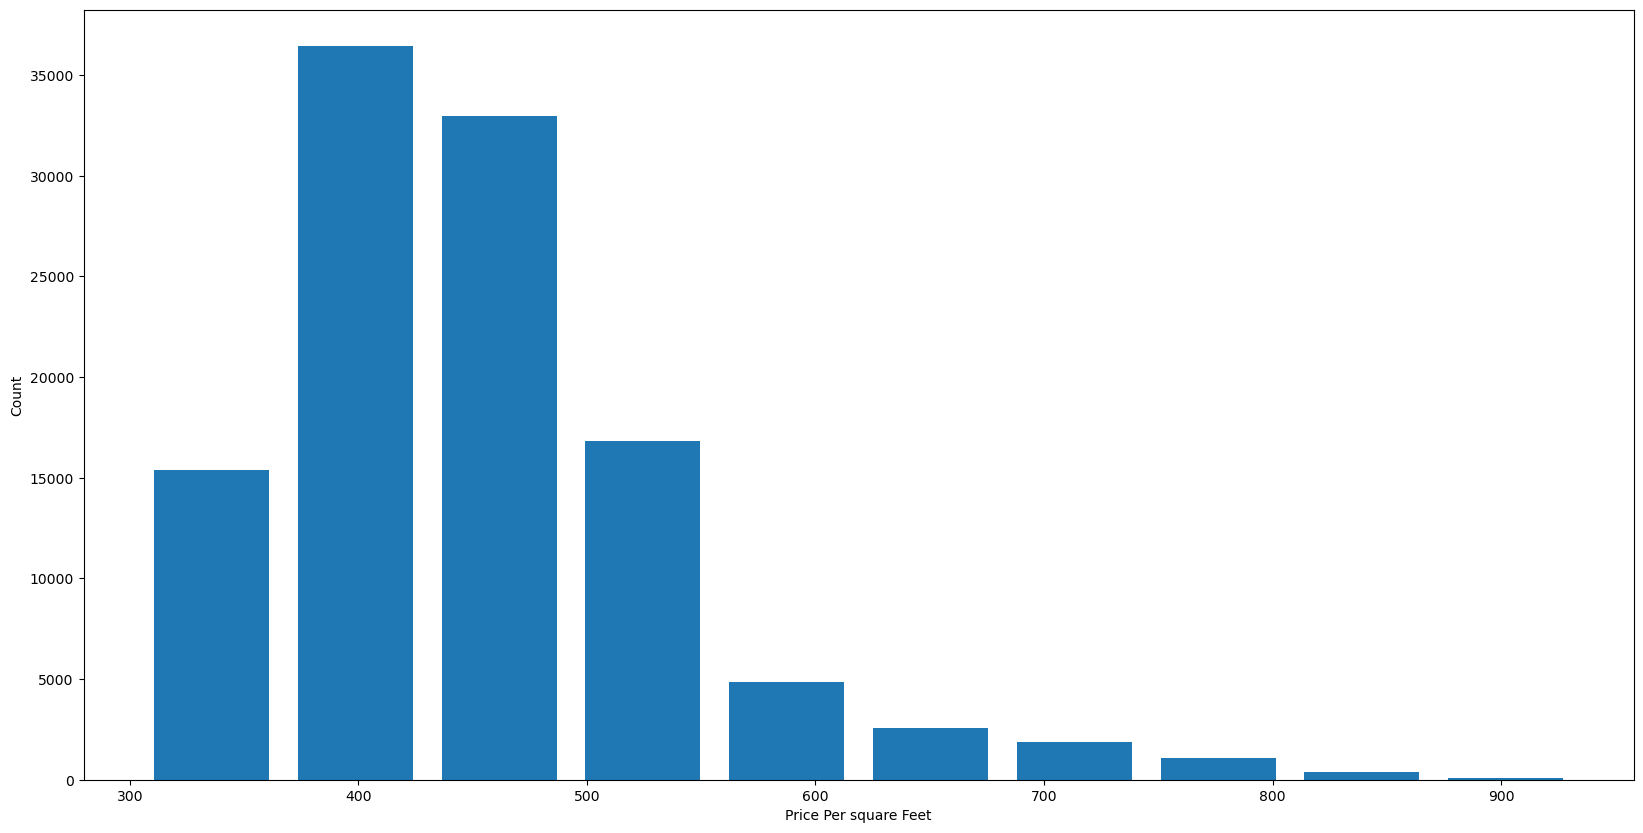

In [71]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per square Feet")
plt.ylabel("Count")

In [73]:
#month	town	flat_type	block	street_name	storey_range	floor_area_sqm	flat_model	lease_commence_date	remaining_lease	resale_price	roomcount	total_sqft	price_per_sqft
df5 = df4.drop(['month','block','flat_type','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date','remaining_lease','price_per_sqft'],axis='columns')
df5.head(3)

,town,resale_price,roomcount,total_sqft
0,ANG MO KIO,232000.0,2.0,473.616
1,ANG MO KIO,262000.0,3.0,721.188
2,ANG MO KIO,265000.0,3.0,731.952


In [75]:
dummies = pd.get_dummies(df5.town)
dummies.head(3)

,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df6 = pd.concat([df5,dummies],axis='columns')
df6.head(3)

,town,resale_price,roomcount,total_sqft,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,ANG MO KIO,232000.0,2.0,473.616,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ANG MO KIO,262000.0,3.0,721.188,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ANG MO KIO,265000.0,3.0,731.952,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df7 = df6.drop('town',axis='columns')
df7.head()

,resale_price,roomcount,total_sqft,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,232000.0,2.0,473.616,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,262000.0,3.0,721.188,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,265000.0,3.0,731.952,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,265000.0,3.0,721.188,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,275000.0,3.0,731.952,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df7.shape

(112446, 29)

In [80]:
#add flow zone also in to x later
X = df7.drop('resale_price',axis='columns')
X.head()

,roomcount,total_sqft,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,2.0,473.616,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,721.188,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,731.952,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,721.188,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,731.952,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
Y = df7.resale_price
Y.head()

0    232000.0
1    262000.0
2    265000.0
3    265000.0
4    275000.0
Name: resale_price, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [83]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.8061801158657185

In [84]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.81203117, 0.81369524, 0.80871559, 0.80929532, 0.80613466])

In [85]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

/Users/heshan/opt/anaconda3/envs/ox/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/heshan/opt/anaconda3/envs/ox/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sk

,model,best_score,best_params
0,linear_regression,0.809977,{'normalize': True}
1,lasso,0.809976,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.872303,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [93]:
def predict_price(location,total_sqft,roomcount):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[1] = total_sqft
    x[0] = roomcount
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [94]:
predict_price('PASIR RIS',500, 2)

/Users/heshan/opt/anaconda3/envs/ox/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


150183.51329554134

In [96]:
predict_price('ANG MO KIO',470, 2)

/Users/heshan/opt/anaconda3/envs/ox/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


191837.46930083726